# **Logistic Regression Model**

Importing the dataset

In [3]:
# import requests

# # URL of the CSV file from Google Drive
# file_id = '1KYF4cDlbsEUIDdN25FHuNUsOfYSSfLnO'
# url = f'https://drive.google.com/uc?export=download&id={file_id}'

# # Send a GET request to the URL
# response = requests.get(url)

# # Check if the request was successful
# if response.status_code == 200:
#     # Save the content of the response to a file
#     with open('heart.csv', 'wb') as f:
#         f.write(response.content)
#     print('File downloaded successfully.')
# else:
#     print(f'Failed to download the file. Status code: {response.status_code}')

In [4]:
import numpy as np
import pandas as pd

In [5]:
# Load the dataset with corrected file paths
x_train = pd.read_csv('../../DataSet for Training and Testing/Training_Set.csv')
x_test = pd.read_csv('../../DataSet for Training and Testing/Testing_Set .csv')
y_test = pd.read_csv('../../DataSet for Training and Testing/y_test.csv')
y_train = pd.read_csv('../../DataSet for Training and Testing/y_train.csv')

Importing Required Libraries

In [6]:
# Load libraries
from sklearn.linear_model import LogisticRegression # Import Logistic Regression model
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Loading Data

In [7]:
col_names = ['Age',	'RestingBP', 'Cholesterol',	'MaxHR', 'Oldpeak',	'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS', 'age_group' 'Cholestoral_group', 'HR_Groups', 'blood_pressure_group', 'Sex', 'ExerciseAngina']

**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [8]:
x_train = x_train
y_train = y_train.values.ravel()  # .values.ravel() converts DataFrame to 1D array
x_test = x_test
y_test = y_test.values.ravel()  # .values.ravel() converts DataFrame to 1D array

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(644, 19)
(162, 19)
(644,)
(162,)


**Building Logistic Regression Model**

Let's create a logistic regression model using Scikit-learn.

In [10]:
# Create Logistic regression classifer object
clf = LogisticRegression()

# Train Logistic regression Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
prediction = clf.predict(x_test)

**Evaluating the Model**

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8518518518518519


In [12]:
score = clf.score(x_test, y_test)
print(score)

0.8518518518518519


In [13]:
# for i in range(0,100):
#   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i) # 85% training and 15% test

#     # Create Logistic regression classifer object
#   clf = LogisticRegression()

#   # Train Logistic regression Classifer
#   clf = clf.fit(x_train,y_train)

#   #Predict the response for test dataset
#   y_pred = clf.predict(x_test)

#   print("Accuracy for RS(",i,"):",metrics.accuracy_score(y_test, y_pred))

**Receiver operating characteristic (ROC)**

A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

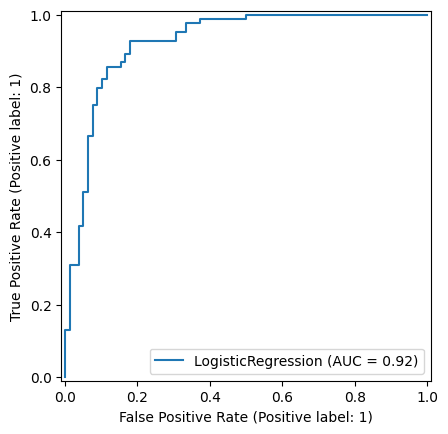

In [14]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

svc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

**Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a binary classifier system. It provides a detailed breakdown of the classification outcomes and allows for the visualization of the performance of the algorithm by displaying the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

In [15]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[65 13]
 [11 73]]


Text(0.5, 1.0, 'Accuracy Score: 0.8518518518518519')

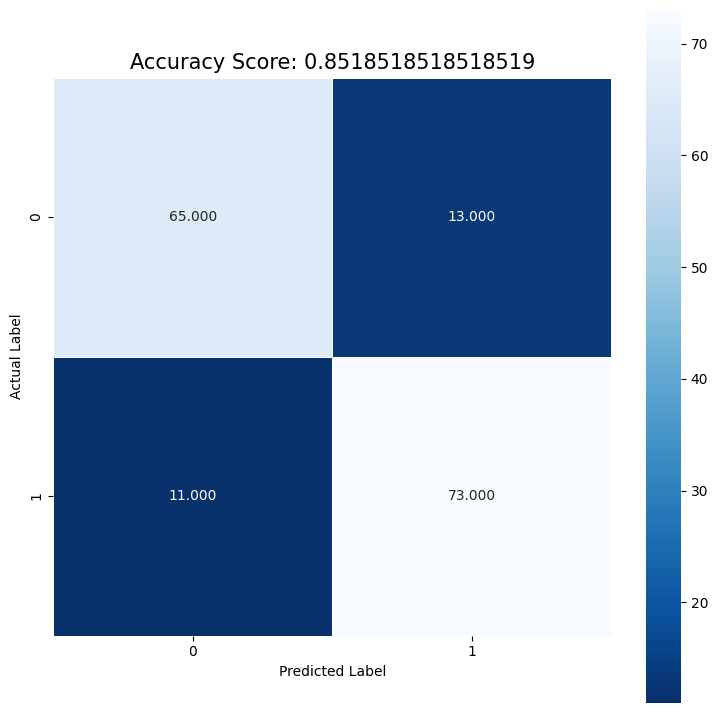

In [16]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

Using the model to predict target of a single test data

In [23]:
# Building a Predictive System
input_data = (0.530833, 0.420256, 0.628738, 0.321111, 0.726842, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1,1)

# change the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

feature_names = ['Age',	'RestingBP', 'Cholesterol',	'MaxHR', 'Oldpeak',	'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS', 'age_group', 'Cholestoral_group', 'HR_Groups', 'blood_pressure_group', 'Sex', 'ExerciseAngina']

input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

prediction = clf.predict(input_data_df)

if (prediction[0]==0):
    print("The person does not have a heart disease")
else:
    print("The person has a heart disease")

The person has a heart disease


In [ ]:
param_grid = [
    # ElasticNet with saga solver
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'C': np.logspace(-10, 10, 20),
        'max_iter': [100, 500, 1000, 2500],
        'tol': [1e-4, 1e-3, 1e-2, 1e-5, 1e-6],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced']
    },
    # L1 penalty with saga solver
    {
        'solver': ['saga'],
        'penalty': ['l1'],
        'C': np.logspace(-10, 10, 20),
        'max_iter': [100, 500, 1000, 2500],
        'tol': [1e-4, 1e-3, 1e-2, 1e-5, 1e-6],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced']
    },
    # L2 penalty with newton-cg solver
    {
        'solver': ['newton-cg'],
        'penalty': ['l2'],
        'C': np.logspace(-10, 10, 20),
        'max_iter': [100, 500, 1000, 2500],
        'tol': [1e-4, 1e-3, 1e-2, 1e-5, 1e-6],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced']
    }
]

logModel = LogisticRegression()

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=logModel,scoring=['accuracy', 'roc_auc', 'f1'], refit='accuracy', param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train, y_train)


Fitting 5 folds for each of 20800 candidates, totalling 104000 fits


In [ ]:
best_clf.best_estimator_

In [38]:
model = LogisticRegression(C=4832.930238571752, class_weight='balanced', tol=0.003)

model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print("Accuracy for RS:",metrics.accuracy_score(y_test, y_pred))

Accuracy for RS: 0.8827160493827161


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Classification report
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        78
           1       0.90      0.87      0.88        84

    accuracy                           0.88       162
   macro avg       0.88      0.88      0.88       162
weighted avg       0.88      0.88      0.88       162



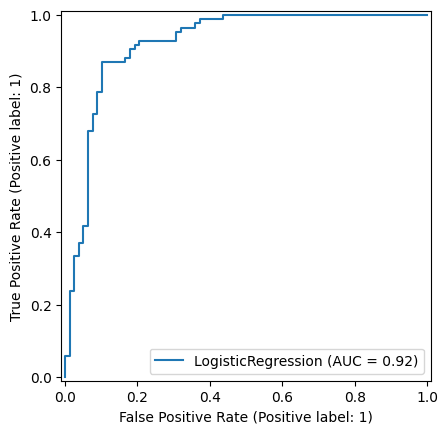

In [25]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [26]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[70  8]
 [11 73]]


Text(0.5, 1.0, 'Accuracy Score: 0.8827160493827161')

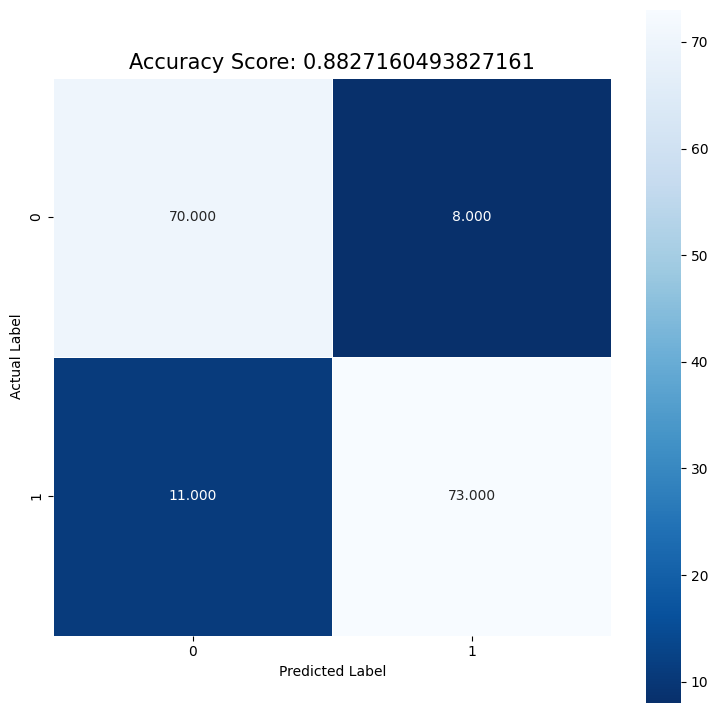

In [27]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)

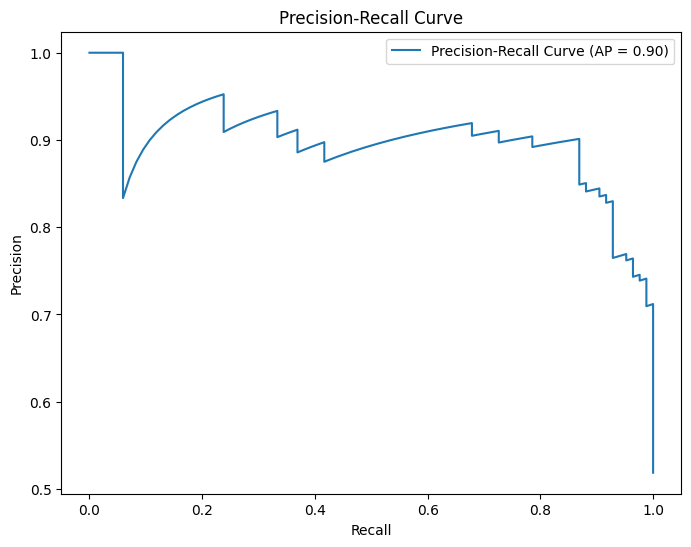

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



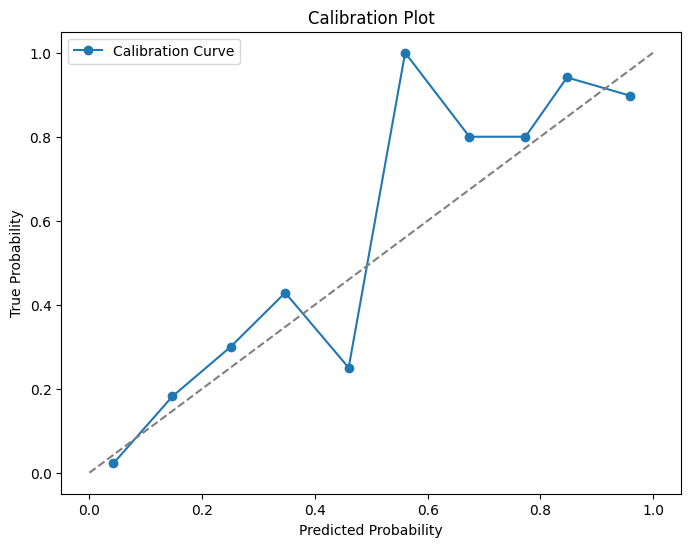

In [41]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_prob)
print(f'Log-Loss: {logloss:.4f}')


Log-Loss: 0.3539


In [43]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc:.4f}')


Matthews Correlation Coefficient: 0.7660


In [44]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen\'s Kappa: {kappa:.4f}')


Cohen's Kappa: 0.7654


Accuracy for the Training Set

In [28]:
#Predict the response for test dataset
y_pred_train = model.predict(x_train)

print("Accuracy for RS:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy for RS: 0.8695652173913043
